In [18]:
#!/usr/bin/env python
# coding: utf-8


# load dataset
import numpy as np
from numpy import dstack
from numpy import array
from numpy import vstack
from pandas import read_csv
from pandas import DataFrame
from numpy import unique
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

In [19]:
# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

In [20]:
# load the total acc data
filenames = ['total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']
total_acc = load_group(filenames, prefix='D:/Research Program/UCI_HAR_Dataset/train/Inertial Signals/')
print(total_acc.shape)
# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

(7352, 128, 3)


In [21]:
# load all train
trainX, trainy = load_dataset('train', 'D:/Research Program/UCI_HAR_Dataset/')
print(trainX.shape, trainy.shape)
# load all test
testX, testy = load_dataset('test', 'D:/Research Program/UCI_HAR_Dataset/')
print(testX.shape, testy.shape)

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)


In [22]:
# summarize the balance of classes in an output variable column
def class_breakdown(data):
	# convert the numpy array into a dataframe
	df = DataFrame(data)
	# group data by the class value and calculate the number of rows
	counts = df.groupby(0).size()
	# retrieve raw rows
	counts = counts.values
	# summarize
	for i in range(len(counts)):
		percent = counts[i] / len(df) * 100
		print('Class=%d, total=%d, percentage=%.3f' % (i+1, counts[i], percent))
 

In [23]:
# load train file
trainy = load_file('D:/Research Program/UCI_HAR_Dataset/train/y_train.txt')
# summarize class breakdown
print('Train Dataset')
class_breakdown(trainy)

Train Dataset
Class=1, total=1226, percentage=16.676
Class=2, total=1073, percentage=14.595
Class=3, total=986, percentage=13.411
Class=4, total=1286, percentage=17.492
Class=5, total=1374, percentage=18.689
Class=6, total=1407, percentage=19.138


In [24]:
# load test file
testy = load_file('D:/Research Program/UCI_HAR_Dataset/test/y_test.txt')
# summarize class breakdown
print('Test Dataset')
class_breakdown(testy)

Test Dataset
Class=1, total=496, percentage=16.831
Class=2, total=471, percentage=15.982
Class=3, total=420, percentage=14.252
Class=4, total=491, percentage=16.661
Class=5, total=532, percentage=18.052
Class=6, total=537, percentage=18.222


In [25]:
# summarize combined class breakdown
print('Both')
combined = vstack((trainy, testy))
class_breakdown(combined)
# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

Both
Class=1, total=1722, percentage=16.720
Class=2, total=1544, percentage=14.992
Class=3, total=1406, percentage=13.652
Class=4, total=1777, percentage=17.254
Class=5, total=1906, percentage=18.507
Class=6, total=1944, percentage=18.876


In [26]:
# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

In [27]:
# group data by activity
def data_by_activity(X, y, activities):
	# group windows by activity
	return {a:X[y[:,0]==a, :, :] for a in activities}

In [28]:
# plot histograms for each activity for a subject
def plot_activity(X, y):
	# get a list of unique activities for the subject
	activity_ids = unique(y[:,0])
	# group windows by activity
	grouped = data_by_activity(X, y, activity_ids)
	# plot per activity, histograms for each axis
	pyplot.figure()
	xaxis = None
	for k in range(len(activity_ids)):
		act_id = activity_ids[k]
		# total acceleration
		for i in range(3):
			ax = pyplot.subplot(len(activity_ids), 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.plot(to_series(grouped[act_id][:,:,i]))
			pyplot.title('activity '+str(act_id), y=0, loc='left')
	pyplot.show()

In [29]:
# plot histograms for each activity for a subject
def plot_activity_histograms(X, y):
	# get a list of unique activities for the subject
	activity_ids = unique(y[:,0])
	# group windows by activity
	grouped = data_by_activity(X, y, activity_ids)
	# plot per activity, histograms for each axis
	pyplot.figure()
	xaxis = None
	for k in range(len(activity_ids)):
		act_id = activity_ids[k]
		# total acceleration
		for i in range(3):
			ax = pyplot.subplot(len(activity_ids), 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.hist(to_series(grouped[act_id][:,:,i]), bins=100)
			pyplot.title('activity '+str(act_id), y=0, loc='left')
	pyplot.show()

In [30]:
# load data
trainX, trainy = load_dataset('train', 'D:/Research Program/UCI_HAR_Dataset/')

In [31]:
# load mapping of rows to subjects
sub_map = load_file('D:/Research Program/UCI_HAR_Dataset/train/subject_train.txt')
train_subjects = unique(sub_map)

In [32]:
# get the data for one subject
sub_id = train_subjects[0]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)

In [33]:
subX.shape

(347, 128, 9)

<ipython-input-28-da3295289a40>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = pyplot.subplot(len(activity_ids), 1, k+1, sharex=xaxis)


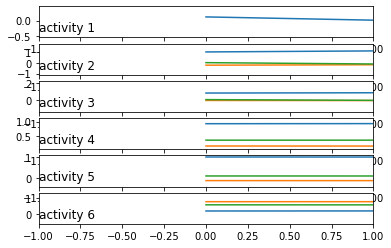

In [34]:
plot_activity(subX, suby)

<ipython-input-29-c1e35847c394>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = pyplot.subplot(len(activity_ids), 1, k+1, sharex=xaxis)


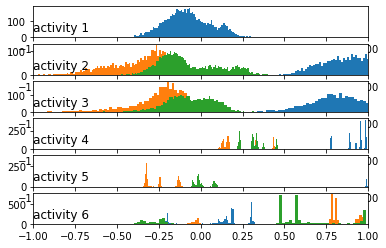

In [35]:
# plot data for subject
plot_activity_histograms(subX, suby)

In [36]:
#trainX = preprocessing.scale(trainX)
# Splitting the dataset into the Training set and Test set
# Feature Scaling

X_train = load_file('D:/Research Program/UCI_HAR_Dataset/train/X_train.txt')
y_train = load_file('D:/Research Program/UCI_HAR_Dataset/train/y_train.txt')
X_test = load_file('D:/Research Program/UCI_HAR_Dataset/test/X_test.txt')
y_test = load_file('D:/Research Program/UCI_HAR_Dataset/test/y_test.txt')

labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']



In [37]:
from sklearn import svm
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.fit(X_train, y_train).predict(X_test)
labels = {1:'STANDING', 2:'SITTING', 3:'WALKING',
          4:'LYING', 5:'UPSTAIR', 6:'DOWNSTAIR'}

C:\Users\Dipanwita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dipanwita\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Dipanwita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dipanwita\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [38]:
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
print (classification_report(y_pred, y_test,
                            target_names=[l for l in labels.values()]))



              precision    recall  f1-score   support

    STANDING       1.00      0.96      0.98       516
     SITTING       0.96      0.98      0.97       462
     WALKING       0.98      1.00      0.99       413
       LYING       0.88      0.97      0.92       444
     UPSTAIR       0.98      0.91      0.94       573
   DOWNSTAIR       1.00      1.00      1.00       539

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947



In [39]:
y_test


array([[5],
       [5],
       [5],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

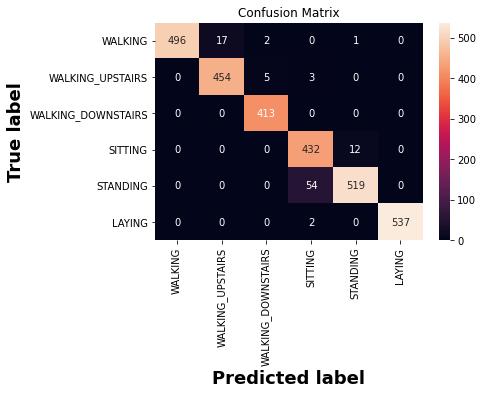

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
# confusion matrix
LABELS = ['WALKING',
          'WALKING_UPSTAIRS',
          'WALKING_DOWNSTAIRS',
          'SITTING',
          'STANDING',
          'LAYING']

matrix = metrics.confusion_matrix(y_pred, y_test)
plt.figure(figsize=(6, 4))
ax=sns.heatmap(matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title('Confusion Matrix')
plt.ylabel('True label', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight='bold', fontsize = 18)
bottom, top = ax.get_ylim()
plt.savefig('C:/Users/Dipanwita/OneDrive/Desktop/confusion_SVC.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()

In [50]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'max_depth':np.arange(2,10,2)}
RF_classifier = RandomForestClassifier()
#dt_classifier_rs = RandomizedSearchCV(dt_classifier,param_distributions=parameters,random_state = 42)
RF_classifier.fit(X_train, y_train)
y_pred_RF = RF_classifier.predict(X_test)

<ipython-input-50-24a54b4142ef>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_classifier.fit(X_train, y_train)


In [51]:
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
print (classification_report(y_pred_RF, y_test,
                            target_names=[l for l in labels.values()]))



              precision    recall  f1-score   support

    STANDING       0.97      0.90      0.93       539
     SITTING       0.91      0.90      0.90       477
     WALKING       0.85      0.96      0.90       371
       LYING       0.91      0.90      0.91       494
     UPSTAIR       0.91      0.92      0.91       529
   DOWNSTAIR       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.92      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947



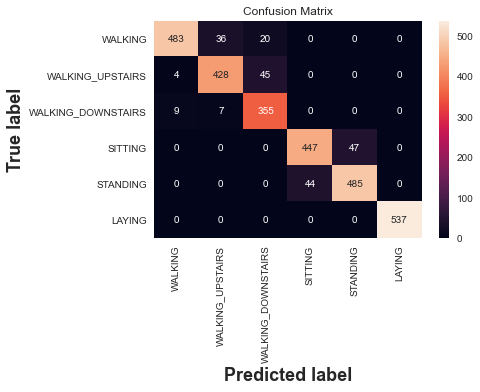

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
# confusion matrix
LABELS = ['WALKING',
          'WALKING_UPSTAIRS',
          'WALKING_DOWNSTAIRS',
          'SITTING',
          'STANDING',
          'LAYING']

matrix = metrics.confusion_matrix(y_pred_RF, y_test)
plt.figure(figsize=(6, 4))
ax=sns.heatmap(matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title('Confusion Matrix')
plt.ylabel('True label', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight='bold', fontsize = 18)
bottom, top = ax.get_ylim()
plt.savefig('C:/Users/Dipanwita/OneDrive/Desktop/confusion_DT.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()

In [62]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(X_train, y_train)

C:\Users\Dipanwita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(solver='liblinear')

In [63]:
y_pred_LR = model_lr.predict(X_test)

In [64]:
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
print (classification_report(y_pred_LR, y_test,
                            target_names=[l for l in labels.values()]))


              precision    recall  f1-score   support

    STANDING       1.00      0.94      0.97       523
     SITTING       0.95      0.97      0.96       461
     WALKING       0.97      1.00      0.98       409
       LYING       0.88      0.97      0.92       445
     UPSTAIR       0.97      0.90      0.94       572
   DOWNSTAIR       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



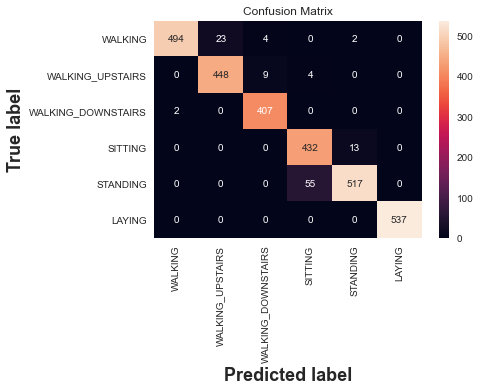

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
# confusion matrix
LABELS = ['WALKING',
          'WALKING_UPSTAIRS',
          'WALKING_DOWNSTAIRS',
          'SITTING',
          'STANDING',
          'LAYING']

matrix = metrics.confusion_matrix(y_pred_LR, y_test)
plt.figure(figsize=(6, 4))
ax=sns.heatmap(matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title('Confusion Matrix')
plt.ylabel('True label', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight='bold', fontsize = 18)
bottom, top = ax.get_ylim()
plt.savefig('C:/Users/Dipanwita/OneDrive/Desktop/confusion_NB.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()

In [77]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_RF, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_LR, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

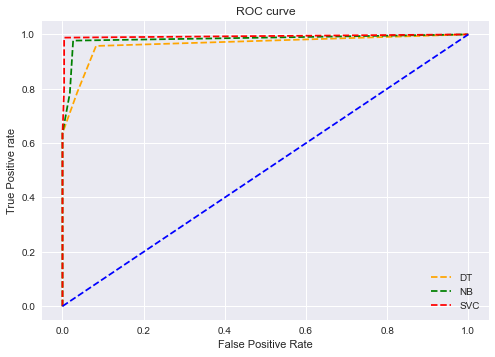

In [81]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr1, fpr1, linestyle='--',color='orange', label='DT')
plt.plot(tpr2, fpr2, linestyle='--',color='green', label='NB')
plt.plot(tpr3, fpr3, linestyle='--',color='red', label='SVC')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('C:/Users/Dipanwita/OneDrive/Desktop/ROC.eps', dpi=300)

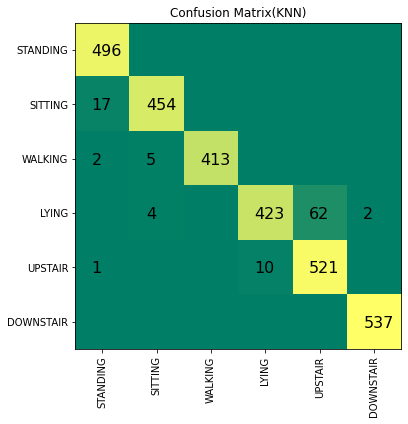

In [41]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)


# Draw the matrix

fig = pyplot.figure(figsize=(6,6))
width = np.shape(cm)[1]
height = np.shape(cm)[0]

res = pyplot.imshow(np.array(cm), cmap=pyplot.cm.summer, interpolation='nearest')
for i, row in enumerate(cm):
    for j, c in enumerate(row):
        if c>0:
            pyplot.text(j-.2, i+.1, c, fontsize=16)
            
#cb = fig.colorbar(res)
pyplot.title('Confusion Matrix(KNN)')
_ = pyplot.xticks(range(6), [l for l in labels.values()], rotation=90)
_ = pyplot.yticks(range(6), [l for l in labels.values()])

In [ ]:
#@title Confusion Matrix
cm = confusion_matrix(testLabelE, yhat)
df_cm = pd.DataFrame(cm, index=[i for i in activity_labels], columns=[i for i in activity_labels])
plt.figure()
ax= sns.heatmap(df_cm,  cbar=False, cmap='BuGn', annot=True, fmt="d")
plt.setp(ax.get_xticklabels(), rotation=45)

plt.ylabel('True label', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight='bold', fontsize = 18)
bottom, top = ax.get_ylim()
plt.savefig('C:/Users/Dipanwita/OneDrive/Desktop/Conference/images/ensemble96.eps', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
import pickle
# save the model to disk
filename = 'svmfinalized_model.sav'
pickle.dump(lin_clf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9674244994910078


In [44]:
class_labels = {1:'STANDING', 2:'SITTING', 3:'WALKING',
          4:'LYING', 5:'UPSTAIR', 6:'DOWNSTAIR'}

In [48]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

In [49]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [51]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
#log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)


In [57]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(solver='liblinear')
modelLR.fit(X_train, y_train)

C:\Users\Dipanwita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(solver='liblinear')

In [59]:
predictionsLR = modelLR.predict(X_test)

In [60]:
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
print (classification_report(predictionsLR, y_test,
                            target_names=[l for l in labels.values()]))


              precision    recall  f1-score   support

    STANDING       1.00      0.94      0.97       523
     SITTING       0.95      0.97      0.96       461
     WALKING       0.97      1.00      0.98       409
       LYING       0.88      0.97      0.92       445
     UPSTAIR       0.97      0.90      0.94       572
   DOWNSTAIR       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [61]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [63]:
level0 = list()
level0.append(('lr', LogisticRegression(solver='liblinear')))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression(solver='liblinear')
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X_train, y_train)
# make a prediction for one example
#data = [[2.47475454,0.40165523,1.68081787,2.88940715,0.91704519,-3.07950644,4.39961206,0.72464273,-4.86563631,-6.06338084,-1.22209949,-0.4699618,1.01222748,-0.6899355,-0.53000581,6.86966784,-3.27211075,-6.59044146,-2.21290585,-3.139579]]
yhat1 = model.predict(X_test)
#print('Predicted Class: %d' % (yhat))

C:\Users\Dipanwita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [73]:
import pandas as pd
from sklearn.metrics import accuracy_score
activity_labels = np.array(pd.read_csv('D:/Research Program/UCI_HAR_Dataset/activity_labels.txt', header=None, delimiter=' '))[:,1]
accuracyensemble = accuracy_score(y_test, yhat1) * 100
print(classification_report(y_test, yhat1, target_names=activity_labels))
print("Accuracy of ensemble: " + str(accuracyensemble) + '%')

                    precision    recall  f1-score   support

           WALKING       0.95      0.99      0.97       496
  WALKING_UPSTAIRS       0.97      0.96      0.96       471
WALKING_DOWNSTAIRS       0.99      0.97      0.98       420
           SITTING       0.97      0.89      0.93       491
          STANDING       0.91      0.97      0.94       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

Accuracy of ensemble: 96.36918900576858%


In [65]:
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
print (classification_report(yhat1, y_test,
                            target_names=[l for l in labels.values()]))


              precision    recall  f1-score   support

    STANDING       0.99      0.95      0.97       517
     SITTING       0.96      0.97      0.96       462
     WALKING       0.97      0.99      0.98       410
       LYING       0.89      0.97      0.93       450
     UPSTAIR       0.97      0.91      0.94       571
   DOWNSTAIR       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.97      0.96      2947
weighted avg       0.97      0.96      0.96      2947



In [76]:
y_test


array([[5],
       [5],
       [5],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

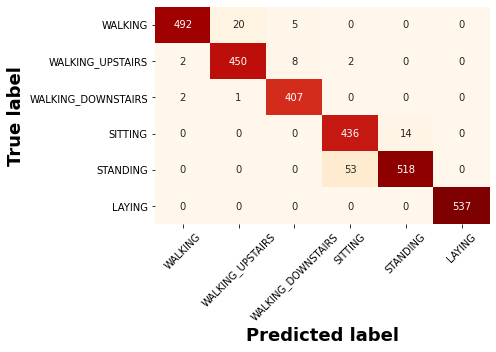

In [75]:
import seaborn as sns
#@title Confusion Matrix
cm = confusion_matrix(yhat1, y_test)
df_cm = pd.DataFrame(cm, index=[i for i in activity_labels], columns=[i for i in activity_labels])
plt.figure()
ax= sns.heatmap(df_cm,  cbar=False, cmap='OrRd', annot=True, fmt="d")
plt.setp(ax.get_xticklabels(), rotation=45)

plt.ylabel('True label', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight='bold', fontsize = 18)
bottom, top = ax.get_ylim()
plt.savefig('C:/Users/Dipanwita/OneDrive/Desktop/conf5.eps', dpi=300, bbox_inches='tight')
plt.show()